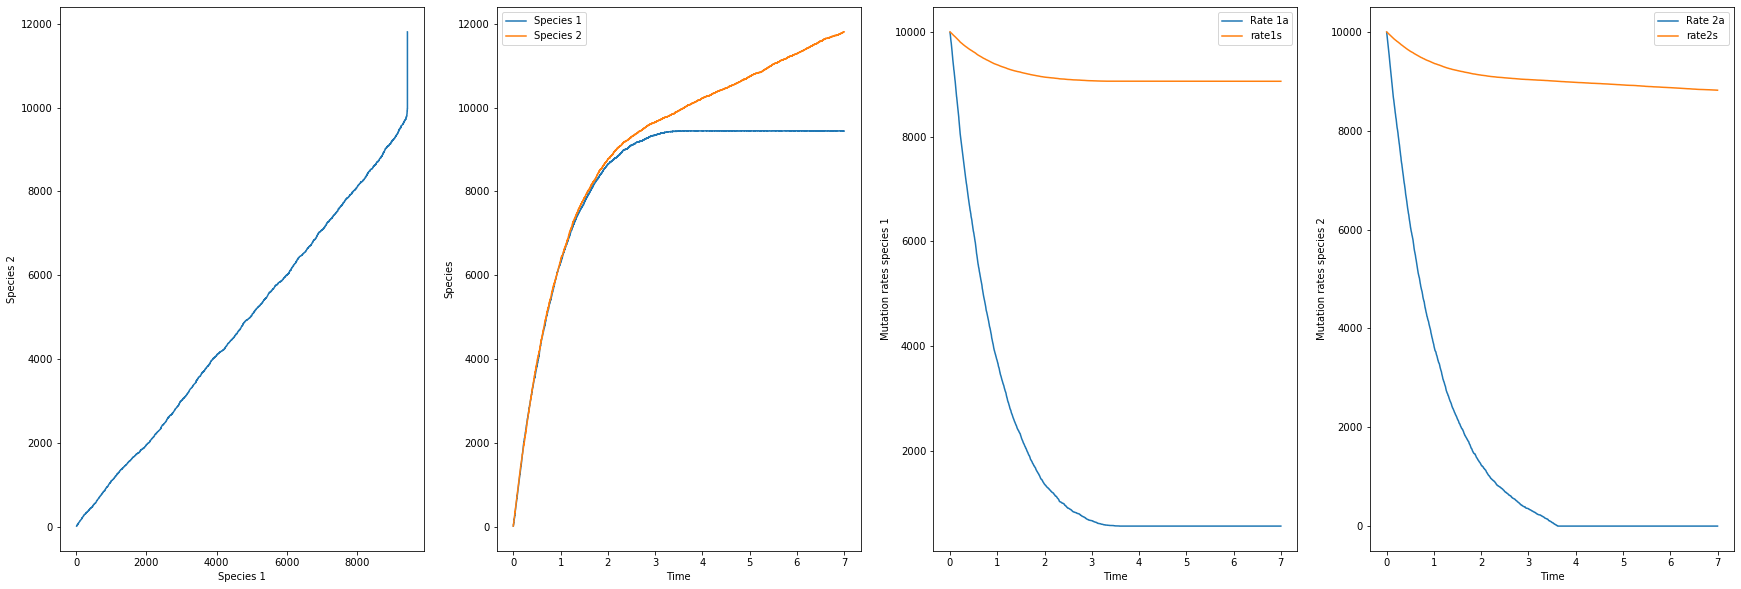

In [128]:
# BGGN 212

import math
import random
import matplotlib.pyplot as plt
import numpy as np

# Input parameters ####################

# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 7.0 

# float; start time
t = 0.0



# CONSTANTS
_alpha1 = 1.0
_beta1 = 0.1
_alpha2 = 1.0
_beta2 = 0.1

#########################################

# Numpy array
data = np.zeros((100000,3))
mutrate1a = np.zeros((100000,1))
mutrate1s = np.zeros((100000,1))
mutrate2a= np.zeros((100000,1))
mutrate2s= np.zeros((100000,1))

data[0,:]=[t, X, Y]

count1=1;
count2=0;

# Main loop
while t < T and ((count1+count2)<100000):
    if X == 0 | Y==0:
        break

    # Rate constants for beneficial mutation occuring in species 1
    w1 =10000-( X)*_alpha1
    w2 =10000-(X)*_beta1 
    if w1 <0:
        w1=0
    if w2<0:
        w2=0
        
    mutrate1a[count1-1]=w1
    mutrate1s[count1-1]=w2
                

            
    W = w1 + w2
    
    # time point at which evolution happens
    dt = -math.log(random.uniform(0.0, 1.0))/W
    t = t + dt

    # make adjustment of comapring which is small and use in place of w2
    if random.uniform(0.0, 1.0) < w2 / W:
        #A1 deleterious mutation in Y
        X = X + 1
        Y = Y - 1
    else:
        #S1 beneficial mutation in Y
        X = X + 1
        Y = Y + 1

   
    data[count1+count2,:]=[t, X, Y]
    count1+=1

    # Rate constants for beneficial mutation occuring in species 2 
    w3 = 10000-(Y)*_alpha2  
    w4 =10000-( Y)*_beta2
    
    if w3 <0:
        w3=0
    if w4<0:
        w4=0
    mutrate2a[count2]=w3
    mutrate2s[count2]=w4
                
    WDASH = w3 + w4

    dt = -math.log(random.uniform(0.0, 1.0)) /WDASH
    
    t = t + dt

    if random.uniform(0.0, 1.0) < w4 / WDASH:
        #A2 
        X = X - 1
        Y = Y + 1
    else:
        #S2
        X = X + 1
        Y = Y + 1

    data[count1+count2,:]=[t,X,Y];
    count2+=1
data=data[0:count1+count2,:]
mutrate2a=mutrate2a[0:count2-1]
mutrate2s=mutrate2s[0:count2-1]
mutrate1a=mutrate1a[0:count1-1]
mutrate1s=mutrate1s[0:count1-1]

# print(data)    
fig,ax=plt.subplots(1,4, figsize = (30, 10))
ax[0].plot(data[:,1],data[:,2])
ax[0].set_xlabel('Species 1')
ax[0].set_ylabel('Species 2')


figure1=ax[1].plot(data[:,0],data[:,1],data[:,0],data[:,2])
ax[1].legend(figure1, ('Species 1','Species 2'))
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Species')
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)

# plt.legend('Species 1','Species 2')    

figure2=ax[2].plot(data[np.arange(1,(count1+count2-1),2),0],mutrate1a,data[np.arange(1,(count1+count2-1),2),0],mutrate1s)
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Mutation rates species 1')
ax[2].legend(figure2, ('Rate 1a','Rate1s'))

# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)


figure3=ax[3].plot(data[np.arange(2,(count1+count2-1),2),0],mutrate2a,data[np.arange(2,(count1+count2-1),2),0],mutrate2s)
ax[3].set_xlabel('Time')
ax[3].set_ylabel('Mutation rates species 2')
ax[3].legend(figure3,('Rate 2a','Rate2s'))

# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)




# with open('Coevo_data.txt', 'w+') as fp:
#     fp.write('\n'.join('%f %i %i' % x for x in data))


In [91]:
print(data)



[[0.00000000e+00 1.00000000e+01 1.00000000e+01]
 [6.55357200e-02 1.10000000e+01 1.10000000e+01]
 [1.28217183e-01 1.20000000e+01 1.20000000e+01]
 ...
 [8.78436854e+00 6.63870000e+04 6.67470000e+04]
 [8.78437344e+00 6.63880000e+04 6.67480000e+04]
 [8.78437735e+00 6.63890000e+04 6.67490000e+04]]


In [119]:
A=np.arange(1,100,1)
print(A[np.arange(1,99,2)])

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96
 98]
